In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('day-35')
jovian.set_colab_id('1rHAzg_EXEkuJEgI1g7cPisrj_tO5SJeT')

# Question 1 :

## Use the User dataset to perform Random Forest and compare with Decision Tree.

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier


In [ ]:
data = pd.read_csv("C:/Users/Nisha/Downloads/data.csv - Sheet1.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.shape

(400, 5)

In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [ ]:
updated_data = data.drop(["User ID", "Gender"], axis=1)


In [ ]:
updated_data.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
X = updated_data.iloc[:,:2]
y = updated_data.iloc[:,2:]
print(X.shape, y.shape)

(400, 2) (400, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(300, 2) (100, 2) (300, 1) (100, 1)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
forest_model = RandomForestClassifier(n_estimators=40, criterion="gini",random_state=100)
forest_model.fit(X_train, y_train)

<ipython-input-18-5abc042d4543>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=40, random_state=100)

In [ ]:
ypred2 = forest_model.predict(X_test)
cm1 = confusion_matrix(y_test, ypred2)
cm1

array([[58,  5],
       [ 2, 35]], dtype=int64)

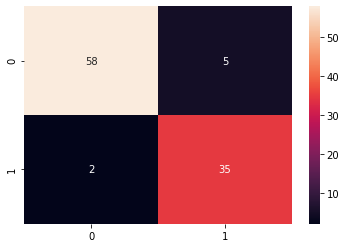

In [ ]:
sns.heatmap(cm1, annot=True)


In [ ]:
accuracy_score(y_test, ypred2)


0.93

In [ ]:
tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=2)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
ypred1 = tree_model.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test, ypred1)
cm


array([[57,  6],
       [ 1, 36]], dtype=int64)

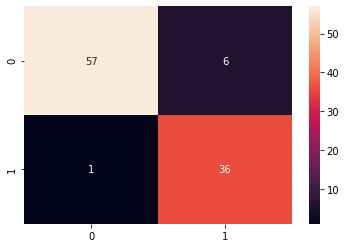

In [ ]:
sns.heatmap(cm, annot=True)


In [ ]:
accuracy_score(y_test, ypred1)

0.93